# Подгрузка

In [11]:
import pickle
import os

path_to_directory = '../week06_prepare/parser/data'
files =  os.listdir(path_to_directory)

files = [item for item in files if '.pickle' in item]
len(files)

46

In [12]:
data_real = [ ]

for file in files:
    with open('../week06_prepare/parser/data/' + file, 'rb') as f:
        data_new = pickle.load(f)
        data_real.extend(data_new)

# Предобработка данных

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [14]:
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
print(df.shape)
df.head()

(35109, 40)


,Тип жилья,Площадь комнат,Санузел,Балкон/лоджия,Ремонт,Вид из окон,Год постройки,Тип дома,Тип перекрытий,Подъезды,...,Планировка,Газоснабжение,Строительная серия,Отделка,Срок сдачи,Комнат в продажу,Всего комнат в квартире,Площадь комнаты,Комната,Размер доли
0,Вторичка,21-14-11 м²,1 раздельный,1 лоджия,Евроремонт,Во двор,2002,Монолитный,Железобетонные,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Вторичка,NaN,2 совмещенных,1 балкон,Без ремонта,NaN,2017,Монолитный,Железобетонные,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Вторичка,43-16-26-14-14 м²,1 раздельный,"1 балкон, 1 лоджия",Дизайнерский,На улицу и двор,1933,Кирпичный,Железобетонные,24,...,Изолированная,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Вторичка,"13,4-18,5-18,7 м²",1 совмещенный,1 балкон,Евроремонт,На улицу и двор,1958,Кирпичный,Железобетонные,6,...,Изолированная,Центральное,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Вторичка Апартаменты,NaN,2 раздельных,1 балкон,Дизайнерский,Во двор,2014,Монолитный,NaN,NaN,...,Изолированная,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35109 entries, 0 to 56075
Data columns (total 40 columns):
Тип жилья                  35109 non-null object
Площадь комнат             22946 non-null object
Санузел                    30941 non-null object
Балкон/лоджия              20907 non-null object
Ремонт                     25126 non-null object
Вид из окон                25229 non-null object
Год постройки              24376 non-null object
Тип дома                   26045 non-null object
Тип перекрытий             22140 non-null object
Подъезды                   23503 non-null object
Лифты                      34196 non-null object
Отопление                  22521 non-null object
Аварийность                24631 non-null object
Парковка                   16778 non-null object
Мусоропровод               15772 non-null object
цена                       35109 non-null int64
описание                   35109 non-null object
Общая                      35108 non-null object
Жилая     

In [16]:
df.shape

(35109, 40)

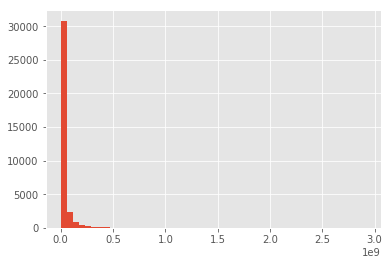

In [17]:
df['цена'].hist(bins=50);

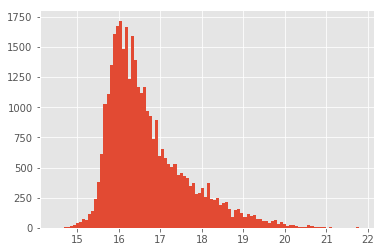

In [18]:
import numpy as np
df['цена'].apply(lambda w: np.log(w)).hist(bins=100);

# Предобработка данных

(35109, 40)


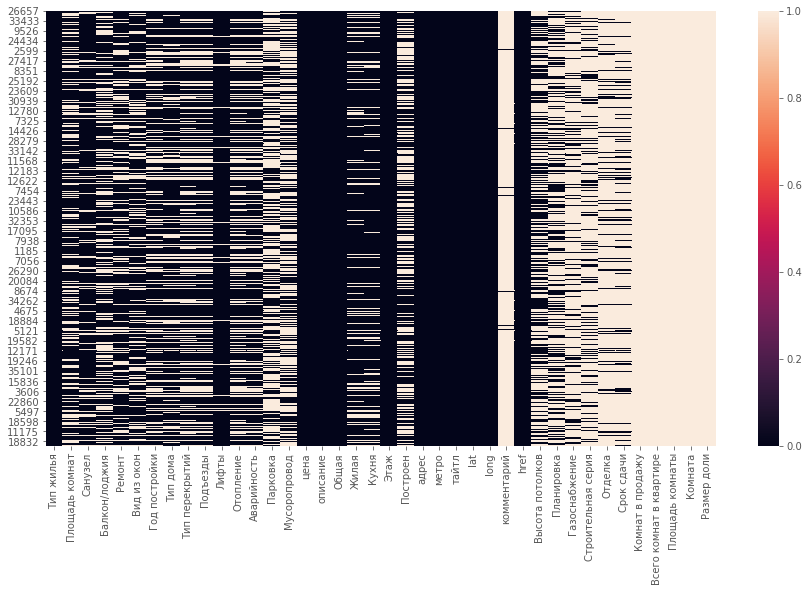

In [19]:
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
df.reset_index(drop=True, inplace=True)

print(df.shape)

dff = pd.DataFrame()  # тут хорошие данные

plt.figure(figsize=(15,8))
sns.heatmap(df.sample(1000).isnull());

Выкидываем неинформативные признаки

In [20]:
df.drop(['Аварийность', 'Комнат в продажу', 'Размер доли'], axis=1, inplace=True)

# пока что выкинем их из рассмотрения, потом если чё вренём
df.drop('Строительная серия', axis=1, inplace=True)

1. Переменная попадает ли дом на реиновацию

In [21]:
df['комментарий'].unique()

array([None,
       'Дом под сносПо результатам голосования жильцов дом включен в программу реновации и будет снесен'],
      dtype=object)

In [22]:
dff['is_reinovation'] = (1 - df['комментарий'].isnull())

2. Категориальные переменные

In [23]:
tradeoff = 0.02*df.shape[0]

In [24]:
import re

def f_create(reg):
    def f(w):
        if w is np.nan:
            return np.nan
        else:
            x = re.findall(reg, w)
            if len(x) == 0:
                return np.nan
            else:
                return str(x[0]) 
    return f

# пример работы фабрики функций
f = f_create('(\d) л')
f('1 балкон, 1 лоджия')

'1'

In [25]:
df.columns

Index(['Тип жилья', 'Площадь комнат', 'Санузел', 'Балкон/лоджия', 'Ремонт',
       'Вид из окон', 'Год постройки', 'Тип дома', 'Тип перекрытий',
       'Подъезды', 'Лифты', 'Отопление', 'Парковка', 'Мусоропровод', 'цена',
       'описание', 'Общая', 'Жилая', 'Кухня', 'Этаж', 'Построен', 'адрес',
       'метро', 'тайтл', 'lat', 'long', 'комментарий', 'href',
       'Высота потолков', 'Планировка', 'Газоснабжение', 'Отделка',
       'Срок сдачи', 'Всего комнат в квартире', 'Площадь комнаты', 'Комната'],
      dtype='object')

In [26]:
df['балконы'] = df['Балкон/лоджия'].apply(f_create('(\d) б'))
df['лоджии'] = df['Балкон/лоджия'].apply(f_create('(\d) л'))

df['санузлы_раздельные'] = df['Санузел'].apply(f_create('(\d) р'))
df['санузлы_совместные'] = df['Санузел'].apply(f_create('(\d) с'))

df['лифты_пас'] = df['Лифты'].apply(f_create('(\d) п'))
df['лифты_гр'] = df['Лифты'].apply(f_create('(\d) г'))

# df[['Балкон/лоджия', 'балконы','лоджии']].sample(10)
df.drop(['Балкон/лоджия', 'Санузел', 'Лифты'], axis=1, inplace=True)

In [27]:
df['комнаты'] = df['тайтл'].apply(lambda w: w.split(' ')[0])
df['комнаты'] = df['комнаты'].apply(lambda w: re.findall('\d',w)[0] if len(re.findall('\d',w))!=0 else "другое")

In [28]:
df.комнаты.value_counts()

2         10385
3         10080
1          7134
4          3979
другое     1899
5          1632
Name: комнаты, dtype: int64

Теперь считаем частоты!        

In [29]:
var_cat = ['Отделка', 'Газоснабжение',
            'Планировка', 'Мусоропровод', 'Парковка',
            'Тип перекрытий', 'Отопление', 'Вид из окон',
            'Ремонт', 'Тип дома', 'Тип жилья',
            'балконы', 'лоджии',   'санузлы_раздельные',
            'санузлы_совместные', 'лифты_пас', 'лифты_гр',
            'комнаты'] 

In [30]:
def freq_less_trade(x):
    freq = df[x].value_counts()
    bad_value = freq[freq < tradeoff].index
    df[x] = df[x].apply(lambda w: 'другое' if w in bad_value else w)

for x in var_cat:
    freq_less_trade(x)

In [31]:
df.head()

,Тип жилья,Площадь комнат,Ремонт,Вид из окон,Год постройки,Тип дома,Тип перекрытий,Подъезды,Отопление,Парковка,...,Всего комнат в квартире,Площадь комнаты,Комната,балконы,лоджии,санузлы_раздельные,санузлы_совместные,лифты_пас,лифты_гр,комнаты
0,Вторичка,21-14-11 м²,Евроремонт,Во двор,2002,Монолитный,Железобетонные,5,Центральное,Подземная,...,NaN,NaN,NaN,NaN,1,1,NaN,2,1,3
1,Вторичка,NaN,Без ремонта,NaN,2017,Монолитный,Железобетонные,2,Центральное,NaN,...,NaN,NaN,NaN,1,NaN,NaN,2,NaN,NaN,2
2,Вторичка,43-16-26-14-14 м²,Дизайнерский,На улицу и двор,1933,Кирпичный,Железобетонные,24,Центральное,NaN,...,NaN,NaN,NaN,1,1,1,NaN,1,NaN,5
3,Вторичка,"13,4-18,5-18,7 м²",Евроремонт,На улицу и двор,1958,Кирпичный,Железобетонные,6,Центральное,Наземная,...,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,3
4,Вторичка Апартаменты,NaN,Дизайнерский,Во двор,2014,Монолитный,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,2,NaN,1,NaN,3


3. Непрерывные переменные

In [32]:
def ceil(w):
    if w is np.nan:
        return np.nan
    else:
        y = float(re.sub('[, ]', '.', w)[:-2])
        if y > 10 and y < 100:
            return y / 10
        elif y >= 100:
            return y/100
        elif y < 2:
            return np.nan
        else:
            return y
    
dff['Высота потолков'] = df['Высота потолков'].apply(ceil)

In [33]:
dff['Подъезды'] = df['Подъезды'].apply(lambda w: w if w is np.nan else int(w))
dff.loc[dff['Подъезды'] > 30, 'Подъезды'] = np.nan

In [34]:
def sq(w):
    if w is np.nan:
        return np.nan
    else:
        y = re.sub(',', '.', w)[:-2]
        y = re.sub(' ', '', y)
        return float(y)
    
dff['Жилая'] = df['Жилая'].apply(sq)
dff['Кухня'] = df['Кухня'].apply(sq)
dff['Общая'] = df['Общая'].apply(sq)

In [35]:
dff.head()

,is_reinovation,Высота потолков,Подъезды,Жилая,Кухня,Общая
0,0,NaN,5.0,46.0,13.0,82.0
1,0,2.64,2.0,NaN,NaN,103.3
2,0,3.40,24.0,113.0,15.0,167.0
3,0,2.70,6.0,50.6,7.7,76.4
4,0,NaN,NaN,41.0,25.0,119.0


In [36]:
df.head()

,Тип жилья,Площадь комнат,Ремонт,Вид из окон,Год постройки,Тип дома,Тип перекрытий,Подъезды,Отопление,Парковка,...,Всего комнат в квартире,Площадь комнаты,Комната,балконы,лоджии,санузлы_раздельные,санузлы_совместные,лифты_пас,лифты_гр,комнаты
0,Вторичка,21-14-11 м²,Евроремонт,Во двор,2002,Монолитный,Железобетонные,5,Центральное,Подземная,...,NaN,NaN,NaN,NaN,1,1,NaN,2,1,3
1,Вторичка,NaN,Без ремонта,NaN,2017,Монолитный,Железобетонные,2,Центральное,NaN,...,NaN,NaN,NaN,1,NaN,NaN,2,NaN,NaN,2
2,Вторичка,43-16-26-14-14 м²,Дизайнерский,На улицу и двор,1933,Кирпичный,Железобетонные,24,Центральное,NaN,...,NaN,NaN,NaN,1,1,1,NaN,1,NaN,5
3,Вторичка,"13,4-18,5-18,7 м²",Евроремонт,На улицу и двор,1958,Кирпичный,Железобетонные,6,Центральное,Наземная,...,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,3
4,Вторичка Апартаменты,NaN,Дизайнерский,Во двор,2014,Монолитный,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,2,NaN,1,NaN,3


In [37]:
# Дз: фабрика функций, mean max median, len  на каждую добаить фичу  #нет смысла в mean

def sq_rooms(how):
    def f(w, how=how):
        if w is np.nan:
            return np.nan
        else:
            y = re.sub(',', '.', w)[:-2]
            y = re.findall("\d+\.\d+|\d+", y)
            y = [float(item) for item in y]
            if len(y)==0:
                return np.nan
            else:
                return how(y)
    return f

f_mean = sq_rooms(np.mean)
f_max = sq_rooms(np.max)
f_min = sq_rooms(np.min)
f_len = sq_rooms(len)

dff['средняя_площадь_комнат'] = df['Площадь комнат'].apply(f_mean)
dff['количество_комнат']=df['Площадь комнат'].apply(f_len)

dff['максимальная_площадь_комнат']=df['Площадь комнат'].apply(f_max)
dff['минимальная_площадь_комнат']=df['Площадь комнат'].apply(f_min)

In [38]:
dff['Этаж'] = df['Этаж'].apply(lambda w: int(w.split(' из ')[0]))
dff['Этажность'] = df['Этаж'].apply(lambda w: int(w.split(' из ')[1]))
dff['первый_этаж'] = df['Этаж'].apply(lambda w: 1*(w.split(' из ')[0] == '1'))
dff['последний_этаж'] = df['Этаж'].apply(lambda w: 1*(w.split(' из ')[0] == w.split(' из ')[1]))

In [39]:
def min_walk_metro(l):
    new = []
    for j in l:
        if 'пешком' in j:
            new.append(int(re.findall('(\d*) мин. пешком',j)[0]))
    if len(new) != 0:
        return min(new)  
    else:
        return np.nan
    
def min_transport_metro(l):
    new = []
    for j in l:
        if 'транспорте' in j:
            new.append(int(re.findall('(\d*) мин. на транспорте',j)[0]))
    if len(new) != 0:
        return min(new)  
    else:
        return np.nan
    
dff['metro_walk_min'] = df['метро'].apply(lambda x: min_walk_metro(x))
dff['metro_auto_min'] = df['метро'].apply(lambda x: min_transport_metro(x))

In [40]:
def stations(mod):
    def find_stations(l, mod=mod):
        l = [re.findall("([ А-Яа-я0-9-.]*) ⋅[ А-Яа-я0-9.]* " + mod, item) for item in l]
        s = [ ]
        for item in l:
            if len(item) == 0:
                continue
            else:
                s.append(item[0].split("откроется")[0])
        return ','.join(s)
    return find_stations

find_walk_st = stations("пешком")
find_auto_st = stations("на транспорте")

dff['stations_walk'] = df['метро'].apply(find_walk_st)
dff['stations_auto'] = df['метро'].apply(find_auto_st)

4. Время 

In [41]:
dff['возраст'] = df['Год постройки'].apply(lambda w: w if w is np.nan else int(w))
dff.loc[dff['возраст'] < 1900, 'возраст'] = np.nan
dff['возраст'] =  2020 - dff['возраст']

In [42]:
df['год сдачи'] = df['Срок сдачи'].apply(lambda w: w if w is np.nan else w.split(' ')[-1])
df['квартал'] = df['Срок сдачи'].apply(lambda w: w if w is np.nan else int(w.split(' ')[0]))

df.loc[df['год сдачи'] < '2020', 'квартал'] = np.nan
df.loc[df['год сдачи'] < '2020', 'год сдачи'] = np.nan
df.loc[df['квартал'] >= 5, 'квартал'] = 1

df['квартал'].replace({1:'01', 2: '04', 3: '07', 4: '10'}, inplace=True)
df['срок сдачи'] = df['год сдачи'].astype(str) + '-' + df['квартал']

In [43]:
from datetime import datetime  # пакет для работы с датами

In [44]:
x = '2021-04'
y = datetime.strptime(x, "%Y-%m")
y

datetime.datetime(2021, 4, 1, 0, 0)

In [45]:
y1 = datetime.strptime('2020-01', "%Y-%m")
(y - y1).days // 30

15

In [46]:
def get_time_delta(x):
    if x is np.nan:
        return x
    else:
        y = datetime.strptime(x, "%Y-%m")
        y1 = datetime.strptime('2020-01', "%Y-%m")
        return (y - y1).days // 30
    
dff['срок сдачи'] = df['срок сдачи'].apply(get_time_delta)

In [47]:
# Дз: распарсить переменную со станциями и временем (пешком/на машине) на мног переменных 
#
# - минимально пешком/на машине
# - максимално 
# - количество станций метро рядом
# - название ближайшей станции если пешком 
# - название ближайшей станции если на машине 
# (если две с одинаковым берем любую) 

In [48]:
a = "{'Октябрьское поле': 662, 'Зорге': 428}"
a

import ast
b = ast.literal_eval(a)
b['Зорге']

428

# Финалочка 

In [49]:
dff[var_cat] = df[var_cat]
dff.head()

,is_reinovation,Высота потолков,Подъезды,Жилая,Кухня,Общая,средняя_площадь_комнат,количество_комнат,максимальная_площадь_комнат,минимальная_площадь_комнат,...,Ремонт,Тип дома,Тип жилья,балконы,лоджии,санузлы_раздельные,санузлы_совместные,лифты_пас,лифты_гр,комнаты
0,0,NaN,5.0,46.0,13.0,82.0,15.333333,3.0,21.0,11.0,...,Евроремонт,Монолитный,Вторичка,NaN,1,1,NaN,2,1,3
1,0,2.64,2.0,NaN,NaN,103.3,NaN,NaN,NaN,NaN,...,Без ремонта,Монолитный,Вторичка,1,NaN,NaN,2,NaN,NaN,2
2,0,3.40,24.0,113.0,15.0,167.0,22.600000,5.0,43.0,14.0,...,Дизайнерский,Кирпичный,Вторичка,1,1,1,NaN,1,NaN,5
3,0,2.70,6.0,50.6,7.7,76.4,16.866667,3.0,18.7,13.4,...,Евроремонт,Кирпичный,Вторичка,1,NaN,NaN,1,NaN,NaN,3
4,0,NaN,NaN,41.0,25.0,119.0,NaN,NaN,NaN,NaN,...,Дизайнерский,Монолитный,Вторичка Апартаменты,1,NaN,2,NaN,1,NaN,3


In [50]:
var_cat = var_cat + ['is_reinovation', 'первый_этаж', 'последний_этаж']
var_real = list(set(dff.columns) - set(var_cat))

var_teh = ['адрес', 'описание', 'href', 'lat', 'long']
target = 'цена'

In [51]:
dff[var_teh] = df[var_teh]
dff[target] =  df[target]

In [54]:
dff.to_csv('data/cian_data.csv', sep='\t', index=None)

Сольём данные с геоданными. 

In [55]:
df_geo = pd.read_csv("data/cian_geo.tsv", sep='\t')

dff = dff.set_index("href")
df_geo = df_geo.set_index("href")
dff_concat = pd.concat([dff, df_geo], axis=1)
dff_concat.reset_index(inplace=True)

In [56]:
dff_concat.to_csv('data/cian_v2.tsv', sep="\t", index=None)

--------

In [73]:
df.iloc[4997]['метро']

['Пражская ⋅  10 мин. на транспорте',
 'Царицыно ⋅  15 мин. на транспорте',
 'Покровское ⋅  15 мин. пешком']

In [74]:
dff_concat.iloc[4997]

href                                       https://www.cian.ru/sale/flat/220830671/
is_reinovation                                                                    0
Высота потолков                                                                2.64
Подъезды                                                                         14
Жилая                                                                            19
Кухня                                                                             7
Общая                                                                            33
средняя_площадь_комнат                                                           19
количество_комнат                                                                 1
максимальная_площадь_комнат                                                      19
минимальная_площадь_комнат                                                       19
Этаж                                                                        

In [ ]:
np.corrcoef(data.metro_walk_min.dropna()[test.astype(float).dropna().index],test.astype(float).dropna())  

In [ ]:
var_cat = ['Отделка', 'Газоснабжение',
'Планировка', 'Мусоропровод', 'Парковка',
'Тип перекрытий', 'Отопление', 'Вид из окон',
'Ремонт', 'Тип дома', 'Тип жилья',

'балконы', 'лоджии',   'санузлы_раздельные',
'санузлы_совместные', 'лифты_пас', 'лифты_гр',
          
'комнаты'] 

var_cat = var_cat + ['is_reinovation', 'первый_этаж', 'последний_этаж']
var_real = list(set(dff.columns) - set(var_cat))

var_teh = ['адрес', 'описание', 'href', 'lat', 'long']
target = 'цена'


# dff = pd.get_dummies(dff)#, dummy_na=True, drop_first=True)
# dff.head()

In [ ]:
dff.shape

In [ ]:
dff.head(3)

In [ ]:
df.columns

In [ ]:
df.адрес

In [ ]:
cat = ['количество_комнат','Отделка','Газоснабжение','Планировка','Мусоропровод',
       'Парковка','Тип перекрытий','Отопление','Вид из окон','Ремонт','Тип дома',
       'Тип жилья','балконы','лоджии','санузлы_раздельные','санузлы_совместные', 
       'лифты_пас', 'лифты_гр','комнаты']

In [ ]:
data.количество_комнат.value_counts() #объединить где больше 4 комнат и создать дамми?

In [ ]:
data.Этаж.value_counts().plot() #нет пропусков

In [ ]:
data.Этажность.dropna()  #нет пропусков

In [ ]:
data.stations_walk  #как учесть?? same as 'stations_auto'

In [ ]:
data['срок сдачи'].dropna() #мало данных, дропаем эту переменную

In [ ]:
data2 = data.drop(['stations_walk','stations_auto','срок сдачи','адрес','описание','href','lat', 'long','stations_walk_walk_dist',
           'stations_walk_walk_time', 'stations_auto_walk_dist','stations_auto_walk_time'],axis=1)
data2.head()

In [ ]:
#Идеи:
# 0) Создать отложенную выборку, на трейновой по кроссвалидации отобрать лучшую модель

# 1) Заполнять наны на жилую и кухню средней пропорцией по трейну

# 2) Заполнять наны потолков, подъездов средним по трейну
#     data['Высота потолков'][data['Высота потолков'].isna()==True]=data['Высота потолков'].mean()
    
# 3) Дропнуть строки, где нет данных по площади комнат

# 4) Создать фичу зависимости этажа в виде гиепрболы???

# 5) Заполнять наны возраста средним по трейну

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data2 = data2.reset_index(drop=True)
data2.head()

In [ ]:
data2 = pd.concat([data2,pd.get_dummies(data2[cat])],axis=1).drop(cat,axis=1)

In [ ]:
data2.head()

In [ ]:
a = data2['средняя_площадь_комнат'].dropna().index
b = data2['Жилая'].dropna().index
c = data2['Кухня'].dropna().index

In [ ]:
take_it = list(set(a) & set(b) & set(c))

In [ ]:
data_final = data2.iloc[take_it,:]
data_final.reset_index(drop=True, inplace=True)

In [ ]:
data_final.drop(['metro_auto_min','metro_walk_min'],axis=1,inplace=True)

In [ ]:
X = data_final.drop('цена',axis=1)
y = data_final.цена

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
floor_high = X_train['Высота потолков'].mean()
X_train['Высота потолков'][X_train['Высота потолков'].isna()==True] = floor_high
X_test['Высота потолков'][X_test['Высота потолков'].isna()==True] = floor_high

In [ ]:
porch = X_train['Подъезды'].mean()
X_train['Подъезды'][X_train['Подъезды'].isna()==True] = porch
X_test['Подъезды'][X_test['Подъезды'].isna()==True] = porch

In [ ]:
age = X_train['возраст'].mean()
X_train['возраст'][X_train['возраст'].isna()==True] = age
X_test['возраст'][X_test['возраст'].isna()==True] = age

In [ ]:
X_train.columns

In [ ]:
#X_train.isna().sum().sort_values(ascending=False) 
    #metro_auto_min          8675
    #metro_walk_min          4139  drop))))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
RFR.fit(X_train,y_train)

In [ ]:
RFR.score(X_test,y_test)

In [ ]:
#Идеи:
# 0) Создать отложенную выборку, на трейновой по кроссвалидации отобрать лучшую модель

# 1) Заполнять наны на жилую, кухню средней пропорцией по трейну     ПРОСТО ДРОПНУЛ ИХ

# 2) Заполнять наны потолков, подъездов средним по трейну  +
#     data['Высота потолков'][data['Высота потолков'].isna()==True]=data['Высота потолков'].mean()
    
# 3) Дропнуть строки, где нет данных по площади комнат  +

# 4) Создать фичу зависимости этажа в виде гиепрболы???

# 5) Заполнять наны возраста средним по трейну  +